# Fully Saturated VS Dynamic

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

In [2]:
beta_path = '../../data/processed/dynamic_twfe/beta_smoothed.csv'
beta_df = pd.read_csv(beta_path, index_col=0)
weighted_beta_path = '../../data/processed/fully_saturated/weighted_beta_smoothed.csv'
weighted_beta_df = pd.read_csv(weighted_beta_path, index_col=0)

In [10]:
class Plotter:
    def __init__(self, coef_data):
        self.coef_data = coef_data

    def plot(self, title=None, path=None):
        fig, ax = plt.subplots(figsize=(10, 5))
        sns.lineplot(x='time_since_treatment', y='mean', data=self.coef_data, ax=ax, color='black', label=f'{title} 推定量', ls='--')
        ax.plot(
            self.coef_data['time_since_treatment'],
            self.coef_data['smoothed_mean'],
            label=f'平滑化 {title} 推定量',
            color='k',
        )
        ax.fill_between(
            self.coef_data['time_since_treatment'],
            y1=self.coef_data['state_smoothed_lwr_post'],
            y2=self.coef_data['state_smoothed_upr_post'],
            alpha=0.5, label='潜在状態の95%信用区間', color='k'
        )
        ax.fill_between(
            self.coef_data['time_since_treatment'],
            y1=self.coef_data['obs_smoothed_lwr_post'],
            y2=self.coef_data['obs_smoothed_upr_post'],
            alpha=0.3, label=f'{title} 推定量の95%信用区間', color='k'
        )
        ax.axvline(x=0, color='k', linestyle=':')
        ax.axhline(y=0, color='k', linestyle=':')
        ax.set_title(f'平滑化 {title} 推定量')
        ax.set_xlabel('経過年数')
        ax.set_ylabel('')
        ax.legend()
        plt.savefig(path)

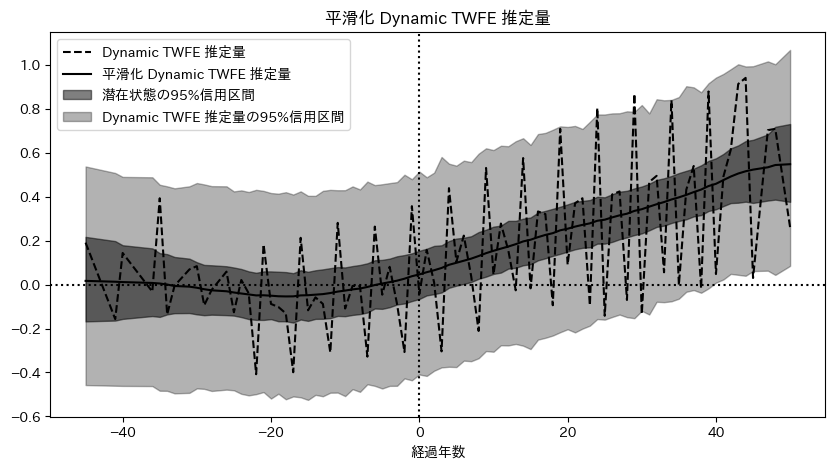

In [12]:
dynamic_plotter = Plotter(beta_df)
dynamic_plotter.plot(title='Dynamic TWFE', path='../../docs/figures/dynamic_twfe/smoothed_ATT.png')

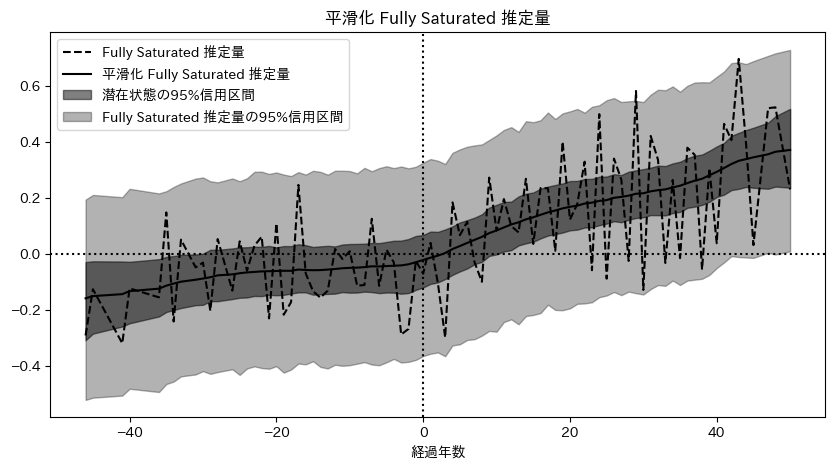

In [13]:
fully_saturated_plotter = Plotter(weighted_beta_df)
fully_saturated_plotter.plot(title='Fully Saturated', path='../../docs/figures/fully_saturated_twfe/smoothed_ATT.png')

## 比較

Text(0, 0.5, '')

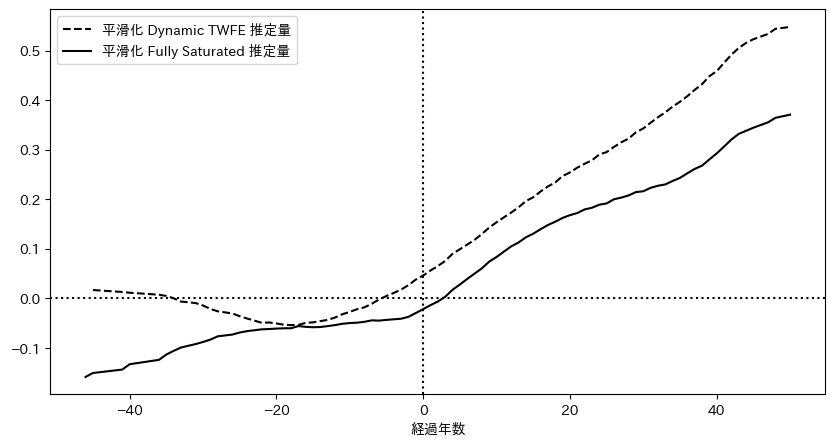

In [27]:
fig, ax = plt.subplots(figsize=(10, 5))
# sns.scatterplot(x='time_since_treatment', y='mean', data=beta_df, ax=ax, color='black', label='Dynamic TWFE 推定量', marker='X')
sns.lineplot(x='time_since_treatment', y='smoothed_mean', data=beta_df, ax=ax, color='black', label='平滑化 Dynamic TWFE 推定量', ls='--')
# sns.scatterplot(x='time_since_treatment', y='mean', data=weighted_beta_df, ax=ax, color='black', label='Fully Saturated 推定量')
sns.lineplot(x='time_since_treatment', y='smoothed_mean', data=weighted_beta_df, ax=ax, label='平滑化 Fully Saturated 推定量', color='k')

ax.axvline(x=0, color='k', linestyle=':')
ax.axhline(y=0, color='k', linestyle=':')

ax.set_xlabel('経過年数')
ax.set_ylabel('')